# **5501 - Assignment_2: Logistic Regression¶**
## Shiva Chakravarthy Gollapudi
### `Student ID: 11468697`

### **1. Load Libraries**

In [36]:
import warnings
warnings.filterwarnings('ignore')

In [37]:
from sklearn import datasets
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

### **2. Load Data**

In [38]:
data = pd.read_csv('/content/winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol' are independent variables 

'Quality' is the dependent variable

In [39]:
data.shape

(1599, 12)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [41]:
# Descriptive statistics table
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### **3. Data Frame Analysis**

Investigate the data
1. Checking for missing values 
2. Checking for correlarion, plot heat map and properties.


In [42]:
# Check for missing values
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There are no missing/null values in the data.

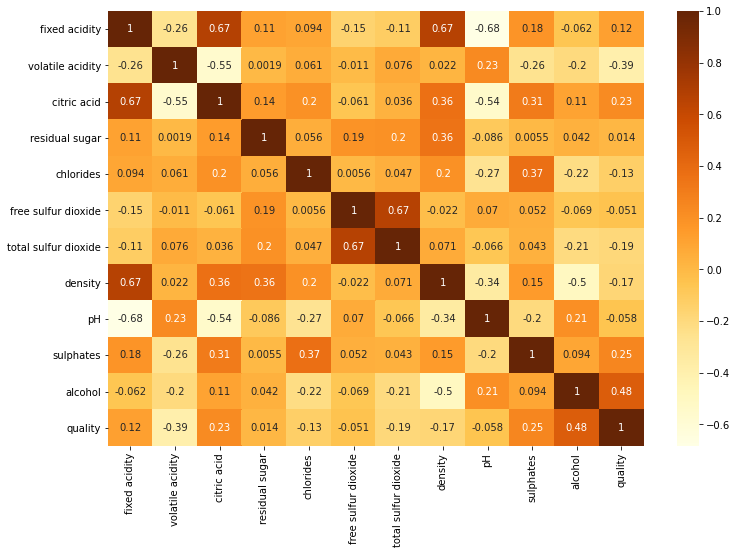

In [43]:
# Checking correlation
plt.subplots(figsize = (12,8))
sns.heatmap(data.corr(), cmap='YlOrBr', annot=True)
plt.show()

From the above heatmap, we see that 'volatile acidity', 'citric acid', 'sulphates', 'alcohol' are most correlated with 'quality', the target variable. 'fixed acidity', 'chlorides', 'total sulfur dioxide', 'density' are less correlated.

Few independent variables are likely multicolinear to each other that can be shown with the high correlation score. Pairs of multicolinear independent variables are 
1. 'total sulfur dioxide' and 'free sulfur dioxide', 
2. 'fixed acidity' and 'citric acid', 
3. 'fixed acidity' and 'density',
4. 'fixed acidity' and 'pH'. 

These may affect the model, so we can exclude the varibles which are having the high correlation score to generate significant model.


### **4. Numerical Variable Analysis**

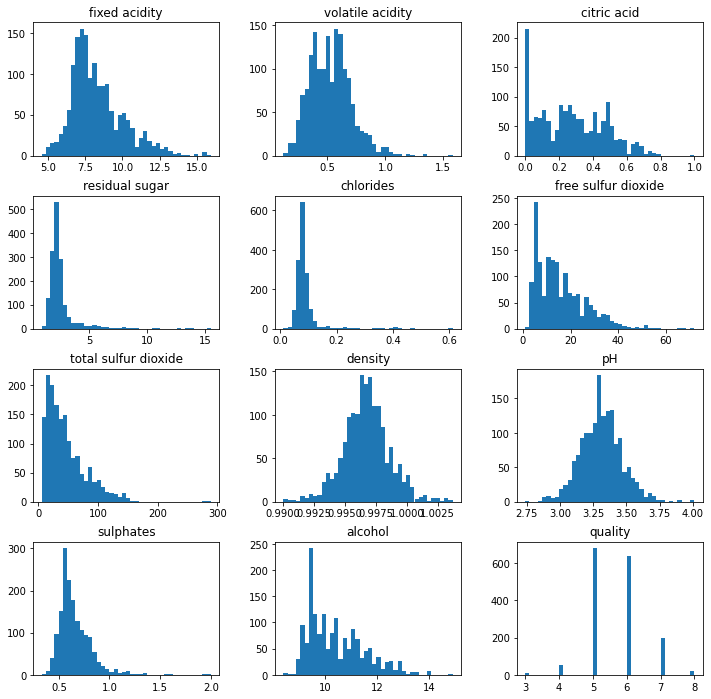

In [44]:
Histogram=data.hist(grid=False, bins=40, figsize=(12,12))

From above histograms, we can conclude that density and PH values are  distributed normally rest all variables are skewed. Quality is a categorical data.



### **5. Categorical Variable Analysis**

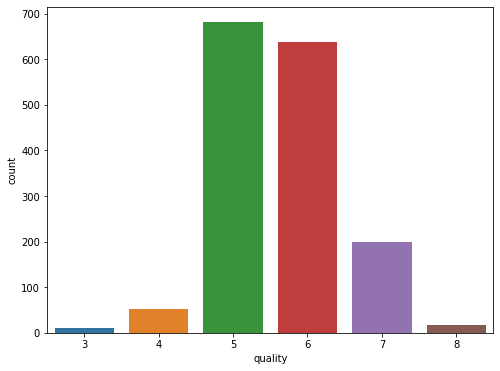

In [45]:
plt.subplots(figsize = (8,6))
sns.countplot(data.quality)
plt.show()

From the obtained data, the wine quality is more in 5 and 6. 

### Encoding

Convert the Target variable(categorical data) into binary.

In [46]:
# Class 3, 4, and 5 are converted into the "low quality" which is 0; otherwise are "high quality" which is 1
data['quality']=np.where(data['quality']>5, 1,0)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


### 6. Model Building
1. Separate independent variable and dependent variable.
2. split the data
3. import the libraries for the algorithm.
4. invoke the function.
5. Fit on Train dataset.
6. Generate predcitions using IV.
7. Check accuracy metrics.
   Classification - Accuracy, ROC and AUC

8. Plot the accuract metrics







In [48]:
# 1. Separate IV and DV
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [49]:
feature_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'] #Only IV.

X = data[feature_cols]
Y = data['quality'] #only DV

In [52]:
X.shape

(1599, 11)

In [53]:
# 2. Split data for training (80%) and testing (20%)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8)

print ('Shapes of X_train, y_train: ', X_train.shape, y_train.shape)
print ('Shapes of X_test, y_test: ', X_test.shape, y_test.shape)

Shapes of X_train, y_train:  (1279, 11) (1279,)
Shapes of X_test, y_test:  (320, 11) (320,)


In [54]:
# 3,4. Import library, invoke 

from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression()

# 5. Fit the model into training set
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
# 6. Generate Predictions 

predictions_train = logmodel.predict(X_train)
predictions_test = logmodel.predict(X_test)

In [96]:
data.pred = pd.DataFrame(logmodel.predict_proba(X_test))
data.pred1 = pd.DataFrame(logmodel.predict_proba(X_train))

In [97]:
data.pred['Final_pred'] = predictions_test
data.pred1['Final_pred'] = predictions_train

In [64]:
data.pred.head(25)

,0,1,Final_pred
0,0.260338,0.739662,1
1,0.196133,0.803867,1
2,0.429522,0.570478,1
3,0.407373,0.592627,1
4,0.228421,0.771579,1
5,0.679431,0.320569,0
6,0.909965,0.090035,0
7,0.775495,0.224505,0
8,0.420397,0.579603,1
9,0.114832,0.885168,1


In [98]:
data.pred1.head(25)

,0,1,Final_pred
0,0.508986,0.491014,0
1,0.300466,0.699534,1
2,0.813468,0.186532,0
3,0.073761,0.926239,1
4,0.594580,0.405420,0
5,0.073166,0.926834,1
6,0.397885,0.602115,1
7,0.577041,0.422959,0
8,0.881666,0.118334,0
9,0.111767,0.888233,1


In [74]:
# Check Accuracy metrics for test
  # Confusion matrix
  # Accuracy curve
  # Classification report
  # Area under curve
  # ROC

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, auc, roc_curve
print(classification_report(y_test, predictions_test)) #Classification matrix
Accuracy_score = accuracy_score(y_test, predictions_test) #Accuracy score
print('Accuracy of the model in the test set: {:.2f}'.format(Accuracy_score)) 

              precision    recall  f1-score   support

           0       0.70      0.70      0.70       149
           1       0.74      0.74      0.74       171

    accuracy                           0.72       320
   macro avg       0.72      0.72      0.72       320
weighted avg       0.72      0.72      0.72       320

Accuracy of the model in the test set: 0.72


In [99]:
# Check Accuracy metrics for train
  # Confusion matrix
  # Accuracy curve
  # Classification report
  # Area under curve
  # ROC

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, auc, roc_curve
print(classification_report(y_train, predictions_train)) #Classification matrix
Accuracy_score = accuracy_score(y_train, predictions_train) #Accuracy score
print('Accuracy of the model in the train set: {:.2f}'.format(Accuracy_score)) 

              precision    recall  f1-score   support

           0       0.73      0.73      0.73       595
           1       0.76      0.76      0.76       684

    accuracy                           0.75      1279
   macro avg       0.75      0.75      0.75      1279
weighted avg       0.75      0.75      0.75      1279

Accuracy of the model in the train set: 0.75


In [75]:
# Confusion matrix for test
cm_test = confusion_matrix(y_true=y_test, y_pred=predictions_test)
pd.DataFrame(cm_test)

,0,1
0,105,44
1,45,126


In [100]:
# Confusion matrix for train
cm_train = confusion_matrix(y_true=y_train, y_pred=predictions_train)
pd.DataFrame(cm_train)

,0,1
0,435,160
1,164,520


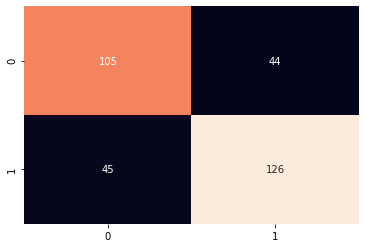

In [78]:
# plot the heat map from the confusion matrix
sns.heatmap(cm_test, annot=True, cbar=False, fmt = 'g')
plt.show()

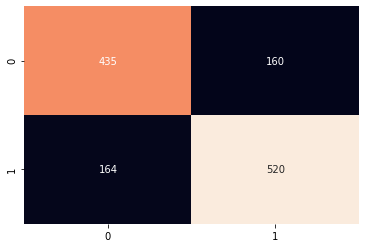

In [101]:
# plot the heat map from the confusion matrix
sns.heatmap(cm_train, annot=True, cbar=False, fmt = 'g')
plt.show()

In [102]:
# find FPR and TPR values
FPR, TPR, _ = roc_curve(y_test,predictions_test)
FPR1, TPR1, _ = roc_curve(y_train,predictions_train)

In [104]:
# Calculate area under curve(AUC)
AUC_test = auc(FPR,TPR)
print('AUC of test data: {:.2f}'.format(AUC_test))
AUC_train = auc(FPR1,TPR1)
print('AUC of train data: {:.2f}'.format(AUC_train))

AUC of test data: 0.72
AUC of train data: 0.75


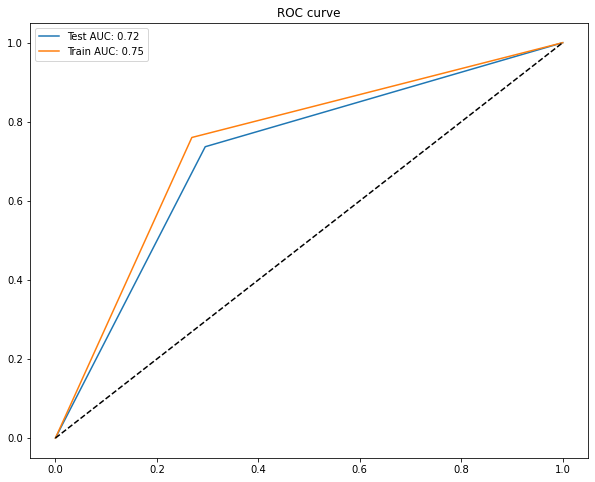

In [108]:
#plot ROC curve
plt.subplots(figsize = (10,8))
plt.plot(FPR,TPR, label= 'Test AUC: %0.2f'%AUC_test)
plt.plot(FPR1,TPR1, label= 'Train AUC: %0.2f'%AUC_train)
plt.title('ROC curve')
plt.legend()
plt.plot([0,1],[0,1], ls='--',color ='black')
plt.show()